# Data investigation plots
*   Categorized data amounts plot with larger scale
*   Categorized data amounts plot with smaller scale
*   Correlation plot from numerical features





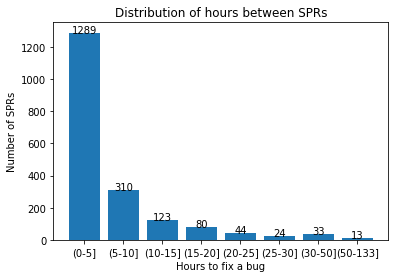

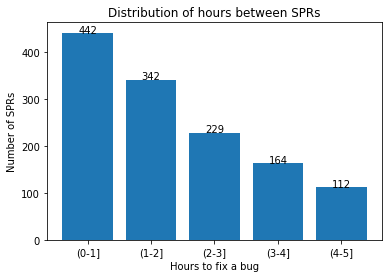

      Unnamed: 0  project_id  reporter_id  ...  time_estimation  tag_id  used_hours
0              0          34           20  ...              NaN     NaN        2.50
1              1          34           20  ...              NaN     NaN        1.88
2              2          34           20  ...              NaN     NaN        6.83
3              3          91           20  ...              0.5     NaN        1.50
4              4          34            7  ...              NaN     NaN        1.00
...          ...         ...          ...  ...              ...     ...         ...
1911        1911          34           59  ...              NaN     NaN        6.00
1912        1912          34           59  ...              NaN     NaN       24.00
1913        1913          34           59  ...              NaN     NaN        7.50
1914        1914          34           59  ...              NaN     NaN        3.75
1915        1915          34           38  ...              NaN     NaN     

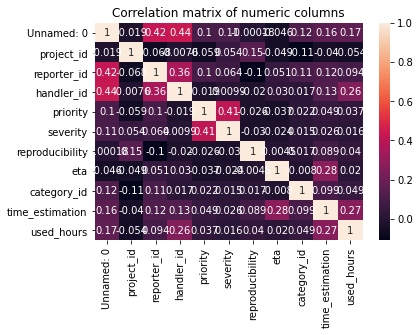

In [5]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

#read data from Google Drive
#drive.mount('/content/drive')

#Get ML data from Google Drive
df = pd.read_excel('/content/drive/My Drive/ML/ml_data.xlsx')

used_hours = df['used_hours']
used_hours = used_hours.to_numpy()

def categorized_data_amounts():

    categories = np.array(['(0-5]', '(5-10]', '(10-15]', '(15-20]', '(20-25]', '(25-30]', '(30-50]', '(50-133]'])
    
    #Amount of SRPs fixed between (0,5]
    zero_to_five = used_hours[(used_hours >= 0) & (used_hours <=5)]
    size_zero_to_five = zero_to_five.size
    
    #Amount of SRPs fixed between (5,10]
    five_to_ten = used_hours[(used_hours > 5) & (used_hours <= 10)]
    size_five_to_ten = five_to_ten.size

    #Amount of SRPs fixed between (10,15]
    ten_to_fifteen = used_hours[(used_hours > 10) & (used_hours <= 15)]
    size_ten_to_fifteen = ten_to_fifteen.size

    #Amount of SRPs fixed between (15,20]
    fifteen_to_twenty = used_hours[(used_hours > 15) & (used_hours <= 20)]
    size_fifteen_to_twenty = fifteen_to_twenty.size

    #Amount of SRPs fixed between (20,25]
    twenty_to_twentyfive = used_hours[(used_hours > 20) & (used_hours <= 25)]
    size_twenty_to_twentyfive = twenty_to_twentyfive.size

    #Amount of SRPs fixed between (25,30]
    twentyfive_to_thirty = used_hours[(used_hours > 25) & (used_hours <= 30)]
    size_twentyfive_to_thirty = twentyfive_to_thirty.size

    #Amount of SRPs fixed between (30,50]
    thirty_to_fifty = used_hours[(used_hours > 30) & (used_hours <= 50)]
    size_thirty_to_fifty = thirty_to_fifty.size

    #Amount of SRPs fixed between (50,133]
    fifty_and_upper = used_hours[(used_hours > 50) & (used_hours <= 133)]
    size_fifty_and_upper = fifty_and_upper.size

    categorized_data = np.array([size_zero_to_five, size_five_to_ten, size_ten_to_fifteen, size_fifteen_to_twenty, size_twenty_to_twentyfive,
    size_twentyfive_to_thirty, size_thirty_to_fifty, size_fifty_and_upper])

    plt.bar(categories, categorized_data)
    xlocs=[i+1 for i in range(0,10)]
    for i, v in enumerate(categorized_data):
        plt.text(xlocs[i] - 1.0, v, str(v), ha='center')
    plt.xlabel('Hours to fix a bug')
    plt.ylabel('Number of SPRs')
    plt.title('Distribution of hours between SPRs')
    plt.show()

def categorized_data_amounts_final():

    categories = np.array(['(0-1]', '(1-2]', '(2-3]', '(3-4]', '(4-5]'])
    
    #Amount of SRPs fixed between (0,1]
    size_zero_to_one = used_hours[(used_hours >= 0) & (used_hours <=1)].size
    
    #Amount of SRPs fixed between (1,2]
    size_one_to_two = used_hours[(used_hours > 1) & (used_hours <= 2)].size

    #Amount of SRPs fixed between (2,3]
    size_two_to_three = used_hours[(used_hours > 2) & (used_hours <= 3)].size

    #Amount of SRPs fixed between (3,4]
    size_three_to_four = used_hours[(used_hours > 3) & (used_hours <= 4)].size

    #Amount of SRPs fixed between (4,5]
    size_four_to_five = used_hours[(used_hours > 4) & (used_hours <= 5)].size

    categorized_data = np.array([size_zero_to_one, size_one_to_two, size_two_to_three, size_three_to_four, size_four_to_five])

    plt.bar(categories, categorized_data)
    xlocs=[i+1 for i in range(0,10)]
    for i, v in enumerate(categorized_data):
        plt.text(xlocs[i] - 1.0, v, str(v), ha='center')
    plt.xlabel('Hours to fix a bug')
    plt.ylabel('Number of SPRs')
    plt.title('Distribution of hours between SPRs')
    plt.show()

def plot_correlation():
    #see correlation for fields with numeric values
    df.drop(['id', 'resolution', 'summary', 'description', 'steps_to_reproduce', 'additional_information'], axis=1, inplace=True)
    print(df)
    corr = df.corr()
    sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True)
    plt.title('Correlation matrix of numeric columns')
    plt.show()

categorized_data_amounts()
categorized_data_amounts_final()
plot_correlation()

